## Load pre-trained models, predict FEP difficulties per perturbation, plug into DiffNet and analyse resulting perturbation network.

In [1]:
from sklearn import preprocessing, decomposition
import pickle
import pandas as pd
import glob
import hydra_features

### Load test set:

In [2]:
# we have a directory containing test set molecule PDB files and a directory of NxN perturbations; featurise:
perturbation_paths = glob.glob("TESTSETS/loeffler18/NxN/*")

# read in list of molecular properties to include (based on which were included in training):
target_column_names = pd.read_csv("features/MOLPROPS/free_featurised.csv").columns.values[1:]
print("Retaining", len(target_column_names), "molecular properties on test set:", target_column_names)


# first compute features for singular molecules:
testset_per_lig_features = hydra_features.computeLigMolProps(freesolv_path="TESTSETS/loeffler18/LIGANDS/", 
                    working_dir="TESTSETS/loeffler18/work/", 
                    target_columns=target_column_names)

Retaining 1048 molecular properties on test set: ['ABC' 'ABCGG' 'nAcid' ... 'Zagreb1' 'Zagreb2' 'mZagreb2']
Computing molecular properties:


100%|██████████| 11/11 [00:00<00:00, 19.51it/s]


### Featurise & preprocess:

In [3]:
hydra_features.computePertMolProps( perturbation_paths, 
                                    freesolv_molprops=testset_per_lig_features,
                                    free_path="TESTSETS/loeffler18/NxN/", 
                                    working_dir="TESTSETS/loeffler18/work/")

  0%|          | 0/110 [00:00<?, ?it/s]/home/jscheen/miniconda3/envs/TSFLW/lib/python3.7/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'free_featurised.h5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*`; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
100%|██████████| 110/110 [00:00<00:00, 276.49it/s]


In [4]:
# load in the written features:
testset_featurised = pd.read_hdf("TESTSETS/loeffler18/work/free_featurised.h5")
testset_featurised

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
methanol~2-methylindole,7.847124,7.174621,0.0,1.0,11.043049,1.363609,2.557136,11.043049,0.304305,1.853427,...,6.803505,7.986505,46.445300,107.109885,-0.184514,107.0,11.0,50.0,59.0,1.194444
neopentane~methane,-3.464102,-3.464102,0.0,0.0,-4.000000,-2.000000,-4.000000,-4.000000,-0.800000,-1.751319,...,0.000000,-7.625107,-28.418928,-56.062600,-1.034558,-16.0,0.0,-20.0,-16.0,-1.000000
ethane~neopentane2,3.464102,3.464102,0.0,0.0,2.000000,1.000000,2.000000,2.000000,-0.200000,1.036860,...,0.000000,6.526495,21.925866,42.046950,0.484949,15.0,0.0,18.0,15.0,0.000000
neopentane2~ethanol,-2.049888,-2.049888,0.0,0.0,-1.171573,-0.585786,-1.171573,-1.171573,0.142809,-0.595009,...,0.000000,-3.450720,-12.108157,-26.052036,0.874945,-12.0,0.0,-14.0,-12.0,0.000000
ethanol~methanol,-1.414214,-1.414214,0.0,0.0,-0.828427,-0.414214,-0.828427,-0.828427,0.057191,-0.441851,...,0.000000,-3.075775,-9.817709,-14.015650,0.221940,-3.0,0.0,-4.0,-3.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2-cyclopentanylindole~7-cyclopentanylindole,-0.040440,0.345752,0.0,0.0,0.031915,0.010312,0.149870,0.031915,0.002280,0.000206,...,-0.143934,0.071652,-0.098644,0.000000,0.000000,-15.0,1.0,0.0,1.0,0.027778
2-methylindole~methane,-7.847124,-7.174621,0.0,-1.0,-13.043049,-2.363609,-4.557136,-13.043049,-1.304305,-2.567886,...,-6.803505,-9.085117,-52.938362,-123.104799,-1.946929,-108.0,-11.0,-52.0,-60.0,-2.194444
2-cyclopentanylindole~methanol,-11.232828,-9.846193,0.0,-1.0,-17.021015,-1.421428,-2.614955,-17.021015,-0.358644,-2.203923,...,-7.297768,-8.388829,-54.061822,-161.156835,0.116539,-292.0,-17.0,-74.0,-89.0,-2.055556
methane~7-cyclopentanylindole,11.192388,10.191946,0.0,1.0,19.052930,2.431740,4.764825,19.052930,1.360924,2.918587,...,7.153834,9.559094,60.456239,177.151750,2.014903,278.0,18.0,76.0,91.0,3.083333


In [5]:
# load scaler and PCA to translate fit to test set:
path_to_scaler_pickle = "trainingsets_prepared/PICKLES/MOLPROPS_scaler.pkl"
path_to_pca_pickle = "trainingsets_prepared/PICKLES/MOLPROPS_pca.pkl"

scaler = pickle.load(open(path_to_scaler_pickle, "rb"))
pca = pickle.load(open(path_to_pca_pickle, "rb"))

# apply both sequentially:
testset_scaled = scaler.transform(testset_featurised)
testset_reduced = pca.transform(testset_scaled)

# back to pandas:
num_PCA_dims = len(testset_reduced[0])
PCA_column_headers = [ "PC"+str(dim) for dim in range(num_PCA_dims)]
testset_processed = pd.DataFrame(testset_reduced, index=testset_featurised.index, columns=PCA_column_headers)

### Load trained model and predict:

In [6]:
import matplotlib.pyplot as plt
# TF-related imports & some settings to reduce TF verbosity:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"	# current workstation contains 4 GPUs; exclude 1st
import tensorflow as tf 
from tensorflow import keras
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [7]:
arch = "models/MOLPROPS_HYDRA_architecture.json"
weights = "models/MOLPROPS_HYDRA_weights.h5"

# use standard keras loading from disk procedure:
with open(arch) as json_file:
    json_config = json_file.read()
keras_model = keras.models.model_from_json(json_config)
keras_model.load_weights(weights)
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 750)               563250    
_________________________________________________________________
dense_1 (Dense)              (None, 90)                67590     
_________________________________________________________________
dense_2 (Dense)              (None, 90)                8190      
_________________________________________________________________
dense_3 (Dense)              (None, 33)                3003      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 34        
Total params: 642,067
Trainable params: 642,067
Non-trainable params: 0
_________________________________________________________________


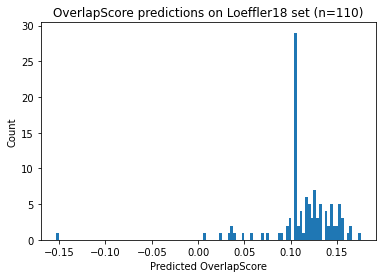

In [13]:
PD_predictions = keras_model.predict(testset_processed)
plt.hist(PD_predictions, bins=len(PD_predictions))
plt.xlabel("Predicted OverlapScore")
plt.ylabel("Count")
plt.title("OverlapScore predictions on Loeffler18 set (n=110)")
plt.show()

### With perturbation difficulty predictions, prepare covariance matrix for DiffNet:

In [9]:
import numpy as np

In [16]:
# shift so that all predictions are >0 and inverse for DiffNet:
lowest_pred_value = min(PD_predictions)
inverse_shifted_OS_preds = 1/(PD_predictions+abs(lowest_pred_value)+0.01)

# organise perturbations in such a way that they can be ordered for matrix restructuring:
test_pd_df = pd.DataFrame(inverse_shifted_OS_preds, index=testset_processed.index, columns=["PD"])
test_pd_df["s_i"] = [ pert.split("~")[0] for pert in test_pd_df.index.values ]
test_pd_df["s_j"] = [ pert.split("~")[1] for pert in test_pd_df.index.values ]


test_pd_df["OS_raw"] = PD_predictions
pd.set_option('display.max_rows', 500)
test_pd_df
# # using the list of molecule names, sort:
# mol_names = testset_per_lig_features.index.values
# sorterIndex = dict(zip(mol_names ,range(len(mol_names))))
# test_pd_df["s_i_rank"] = test_pd_df["s_i"].map(sorterIndex)
# test_pd_df["s_j_rank"] = test_pd_df["s_j"].map(sorterIndex)

# # group for iteration to populate np matrix:
# test_pd_df = test_pd_df.sort_values(["s_i_rank", "s_j_rank"]).groupby("s_i", sort=False)

# # populate list of ligand names for network generation:
# ligand_names_in_mtx = []

# # populate matrix
# pre_mtx_asym = np.zeros((len(mol_names),len(mol_names)), dtype=float)
# for i, row_data in zip(range(0, len(mol_names)), test_pd_df):
    
#     ligand_names_in_mtx.append(row_data[0])
#     pd_preds_list = list(row_data[1]["PD"].values)

#     # insert inf for s_ii:
#     pd_preds_list[i:i] = [np.infty]
    
#     # populate row:
#     pre_mtx_asym[i,:] = pd_preds_list

# # symmetrise by keeping lowest PD per molecule pair:
# pre_mtx_sym = np.minimum( pre_mtx_asym, pre_mtx_asym.transpose() )

# # save:
# np.save("TESTSETS/loeffler18/work/output/sij_sym", pre_mtx_sym)


,PD,s_i,s_j,OS_raw
methanol~2-methylindole,4.925565,methanol,2-methylindole,0.039807
neopentane~methane,3.715638,neopentane,methane,0.105917
ethane~neopentane2,3.742501,ethane,neopentane2,0.103986
neopentane2~ethanol,3.515069,neopentane2,ethanol,0.121274
ethanol~methanol,3.375728,ethanol,methanol,0.133017
methane~2-cyclopentanylindole,3.742501,methane,2-cyclopentanylindole,0.103986
2-methylindole~toluene,4.555155,2-methylindole,toluene,0.056316
2-cyclopentanylindole~ethanol,3.382788,2-cyclopentanylindole,ethanol,0.132399
neopentane2~methanol,3.836731,neopentane2,methanol,0.097423
methane~ethanol,3.617177,methane,ethanol,0.113243


Now load these matrices into diffnet_pred_ntwk_loeffler18.ipynb while using the python2 conda env "DiffNet2"

In [11]:
# save ligand names in the order they appear in sij as well as .png files per ligand:
from rdkit import Chem
import csv

path_to_test_ligands = "TESTSETS/loeffler18/LIGANDS/"
path_to_save_imgs = "TESTSETS/loeffler18/work/mol_imgs/"

with open(path_to_save_imgs+"ligand_index.csv", "w") as f:
    writer = csv.writer(f)
    for ligand in ligand_names_in_mtx:
        writer.writerow([ligand])


for ligand in ligand_names_in_mtx:
    m = Chem.rdmolfiles.MolFromPDBFile(path_to_test_ligands+ligand+".pdb")
    # 2d structure for easier depiction in network:
    Chem.AllChem.Compute2DCoords(m)
    
    Chem.Draw.MolToFile(m, path_to_save_imgs+ligand+".png", imageType='png', transparent=True)
    